In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import regex as re

pd.set_option('max_columns',30)

In [494]:
dsetPath = '../data/data_webambiente.csv'

df = pd.read_csv(dsetPath,sep='\t')

# Check nulls

Drop row in which all values are nulls

In [495]:
df.dropna(how='all',inplace=True)

In [3]:
pd.concat({
    'Num of nulls':df.isnull().sum(), 
    'Pct of nulls':df.isnull().mean().apply(lambda x: "{:.2f}".format(x))}, 
    axis=1).sort_values('Pct of nulls', ascending=False)

,Num of nulls,Pct of nulls
Desenvolvimento da muda no campo,311,0.40
Recomendação de adubação no plantio no campo,298,0.38
Nível de sombreamento da muda no viveiro,276,0.35
Armazenamento,270,0.35
Desenvolvimento da muda no viveiro,259,0.33
Sinonímia,232,0.30
Número de sementes/kg,210,0.27
Porcentagem de germinação,181,0.23
Tolerância a Sombra,158,0.20
Uso Econômico,152,0.19


# Data cleaning

#### Clean field 'Substrato da muda'
Remove newline,tab and carriage return characters, and then remove the "Saiba mais" field

In [5]:
df['Substrato da muda'][0]

'\r\n\r\n\r\nCompostos orgânicos (esterco bovino, casca de eucalipto, bagaço de cana) + terra + vermiculita. Mais informações no MANUAL TÉCNICO PARA A RESTAURAÇÃO DE ÁREAS DEGRADADAS NO ESTADO DO RIO DE JANEIRO (Moraes et al., 2012).\r\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t[Saiba mais]\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\r\n\r\n\r\n'

In [6]:
df['Substrato da muda'].replace(to_replace="([\n\t\r])|(\[Saiba mais\])", value='', regex=True,inplace=True)

In [8]:
df['Substrato da muda'][0]

'Compostos orgânicos (esterco bovino, casca de eucalipto, bagaço de cana) + terra + vermiculita. Mais informações no MANUAL TÉCNICO PARA A RESTAURAÇÃO DE ÁREAS DEGRADADAS NO ESTADO DO RIO DE JANEIRO (Moraes et al., 2012).'

In [7]:
df['Substrato da muda'].replace('',pd.np.NaN, inplace=True) # set resulting empty strings to be NaN

# Categorical data

In [525]:
import unicodedata
normalize_str = lambda x: unicodedata.normalize('NFKD',x).encode('ascii', errors='ignore').decode('utf-8').lower()

### Species names

Separate species names from authors

In [487]:
df['Espécie'].head()

0      Abarema brachystachya(DC.) Barneby & J.W.Grimes
1       Abarema cochleata(Willd.) Barneby & J.W.Grimes
2    Abarema floribunda(Spruce ex Benth.) Barneby &...
3            Abarema jupunba(Willd.) Britton & Killip.
4                  Abarema piresiiBarneby & J.W.Grimes
Name: Espécie, dtype: object

In [500]:
df['Espécie'] = df['Espécie'].apply(lambda x: re.findall('[A-Z]\w+\s[a-z]+',x)[0])

In [501]:
df['Espécie'].head()

0    Abarema brachystachya
1        Abarema cochleata
2       Abarema floribunda
3          Abarema jupunba
4          Abarema piresii
Name: Espécie, dtype: object

In [505]:
df['genus'] = df['Espécie'].apply(lambda x: x.split(' ')[0])

In [508]:
df['genus'].value_counts().head()

Paspalum        19
Aspidosperma    14
Axonopus        13
Inga            13
Annona          10
Name: genus, dtype: int64

### Biome

Extract biomes from string into lists

In [535]:
df['Bioma'].head()

0    [mata atlantica]
1          [amazonia]
2          [amazonia]
3          [amazonia]
4          [amazonia]
Name: Bioma, dtype: object

In [528]:
df['Bioma'] = df['Bioma'].apply( lambda x: [ normalize_str(b.strip()) for b in x.split(',') ] )

In [536]:
df['Bioma'].head()

0    [mata atlantica]
1          [amazonia]
2          [amazonia]
3          [amazonia]
4          [amazonia]
Name: Bioma, dtype: object

In [534]:
list(set([ i for l in df['Bioma'] for i in l]))

['pantanal', 'pampa', 'mata atlantica', 'amazonia', 'cerrado', 'caatinga']

### Vegetation formations

In [545]:
df['Formação Vegetal'].head()

0    Florestal, Savânica
1    Florestal, Savânica
2              Florestal
3    Florestal, Savânica
4    Florestal, Savânica
Name: Formação Vegetal, dtype: object

In [547]:
df['Formação Vegetal'] = df['Formação Vegetal'].apply( lambda x: [ normalize_str(f.strip()) for f in x.split(',') ] )
df['Formação Vegetal'].head()

0    [florestal, savanica]
1    [florestal, savanica]
2              [florestal]
3    [florestal, savanica]
4    [florestal, savanica]
Name: Formação Vegetal, dtype: object

In [549]:
list(set([ i for l in df['Formação Vegetal'] for i in l]))

['florestal', 'campestre', 'savanica']

### Phytophysiognomies

Maybe we could reduce the number of classes here...

In [537]:
df['Fitofisionomias'].head()

0    Floresta Ombrófila Densa, Restinga Arbórea/Arb...
1                     Campinarana, Savana, Terra Firme
2                                          Terra Firme
3                                Restinga, Terra Firme
4                             Campinarana, Terra Firme
Name: Fitofisionomias, dtype: object

In [541]:
df['Fitofisionomias'] = df['Fitofisionomias'].apply(lambda x: [ normalize_str(f.strip()) for f in x.split(',') ])
df['Fitofisionomias'].head()

0    [floresta ombrofila densa, restinga arborea/ar...
1                   [campinarana, savana, terra firme]
2                                        [terra firme]
3                              [restinga, terra firme]
4                           [campinarana, terra firme]
Name: Fitofisionomias, dtype: object

In [544]:
sorted(list(set([ i for l in df['Fitofisionomias'] for i in l])))

['banhado',
 'caatinga arborea',
 'caatinga arbustiva',
 'caatinga ciliar',
 'caatinga herbacea',
 'campinarana',
 'campo de altitude (morraria)',
 'campo inundavel',
 'campo limpo',
 'campo nao inundavel',
 'campo rupestre',
 'campo seco',
 'campo sujo',
 'campo umido',
 'campos naturais',
 'campos rupestres',
 'cerradao',
 'cerrado',
 'cerrado rupestre',
 'cerrado tipico',
 'chaco',
 'floresta estacional',
 'floresta estacional decidual',
 'floresta estacional semidecidual',
 'floresta estacional sempre verde',
 'floresta ombrofila densa',
 'floresta ombrofila mista',
 'formacoes rochosas',
 'manguezal',
 'mata brejo de altitude',
 'mata ciliar',
 'mata de galeria',
 'mata de varzea',
 'mata riparia',
 'mata seca',
 'mata seca (decidua)',
 'mata semidecidua',
 'palmeiral',
 'parque de cerrado',
 'restinga',
 'restinga arborea/arbustiva',
 'savana',
 'terra firme',
 'vegetacao savanoide',
 'vereda']

# Exploring data

In [12]:
df['Porte da planta'].value_counts()

Árvore (> 3 metros)        539
Erva                       115
Arbusto                     44
Arvoreta (≤  3 metros)      37
Palmeira                    25
Subarbusto                  10
Liana                        7
erva                         2
arbusto                      1
Árvore (> que 3 metros)      1
Name: Porte da planta, dtype: int64

In [13]:
df['Substrato da muda'].value_counts()

T3 Floresta (BDF = BEM DRENADO FÉRTIL)                                                                                                                                                                                          214
3 partes de terra preta+ 1 parte de serragem +1  parte de esterco de gado ou cama de aviário                                                                                                                                    167
T1 Cerrado (BDPF = BEM DRENADO POUCO FÉRTIL)                                                                                                                                                                                     88
Compostos orgânicos (esterco bovino, casca de eucalipto, bagaço de cana) + terra + vermiculita. Mais informações no MANUAL TÉCNICO PARA A RESTAURAÇÃO DE ÁREAS DEGRADADAS NO ESTADO DO RIO DE JANEIRO (Moraes et al., 2012).     66
T4 Floresta (MDF = MAL DRENADO FÉRTIL)                                                  

This is a descriptive field...

In [14]:
df['Beneficiamento de sementes'].value_counts()

Coleta dos pendões com foice de mão. Observar que as sementes devem estar dispersando (soltando naturalmente dos pendões). Os pendões são passados em máquina trituradora de palha (ensiladeira) para desagregação das sementes.                                                                                                                                                                                                                                           45
Colher as vagens diretamente da árvore quando iniciarem o amarelamento do fruto. Em seguida abri-las e retirar as sementes manualmente. Fazer o plantio direto, não deixá-las secar, pois as sementes não toleram perda de umidade.                                                                                                                                                                                                                                        13
Colheita e abertura manual dos frutos. Observar que os frutos devem estar se

This field should be normalized, and parentheses removed.

In [16]:
df['Dispersão'].value_counts()

Anemocoria (vento)       224
Zoocoria (Fauna)         214
Zoocoria (fauna)         177
Autocoria                 93
Epizoocoria               17
Autocoria, hidrocoria      2
Hidrocórica                1
Name: Dispersão, dtype: int64

This field should be cleaned!

In [15]:
df['Polinização'].dropna().value_counts()

Abelhas                                                   291
Vento                                                      68
Mariposas                                                  37
Morcegos                                                   32
abelhas                                                    29
insetos                                                    28
Besouros                                                   25
Abelhas, moscas                                            21
Beija-flores                                               18
Abelhas, besouros                                          16
abelhas e diversos insetos pequenos                        15
Abelhas, vespas                                            12
Moscas                                                     11
Abelhas, mariposas                                         10
abelhas e outros insetos                                    6
Morcegos, beija-flores                                      6
Abelhas,

In [18]:
df['Polinização'].replace('\(.*\)','',regex=True,inplace=True) # remove authors names (between parentheses)

sorted(list(set(
    [ pol.strip() for polinators in 
      df['Polinização'].dropna().apply(lambda x: re.split('((?: e )|(?:,))',x))
      for pol in polinators ]
)))

[',',
 'Abelhas',
 'Abelhas sem ferrão',
 'Aves',
 'Beija-flores',
 'Besouros',
 'Dipteros',
 'Dípteros',
 'Insetos',
 'Mariposa',
 'Mariposas',
 'Marsupiais',
 'Megachile.',
 'Morcegos',
 'Moscas',
 'Pequenos insetos',
 'Vento',
 'Vespas',
 'abelha',
 'abelhas',
 'autopolinização',
 'aves',
 'beija-flores',
 'besouros',
 'borboletas',
 'coleópteros',
 'diversos insetos pequenos',
 'diversos pequenos insetos',
 'do Gênero Bombus',
 'dípteros',
 'e',
 'formigas',
 'hemipteros',
 'insetos',
 'insetos pequenos',
 'mariposas',
 'marsupiais',
 'microhimenópteros da família vespidae',
 'morcegos',
 'moscas',
 'outros insetos',
 'pequenos insetos',
 'principalmene abelhas',
 'sirfideos',
 'vento',
 'vespas']

---

# Period-like data

Period-like data describe periods in which an event occurrs (or is observed). In this dataset, we have period-like fields such as flowering period `Período de Floração` and seed gathering period `Período de Coleta de Sementes`. 
In this dataset, this is descriptive data, and must be parsed and structure before it can be useful. 

In [407]:
pf = df['Período de floração']
pcs = df['Período de coleta de sementes']
pfru = df['Período de frutificação']

In [64]:
set( v for v in pf )

{'Amazônia - out-fev; Caatinga - ago - nov',
 'Caatinga - out - nov; Pampa - out-jan',
 'Cerrado - Ao longo do ano',
 'Cerrado - Ao longo do ano; Pampa - dez-mar',
 'Cerrado - abr-jul',
 'Cerrado - abr-jul; Mata Atlântica - fev - abr (abr-jun)',
 'Cerrado - abr-jul; Pampa - fev-abr',
 'Cerrado - abr-jun',
 'Cerrado - abr-jun ; Pantanal -  jun - jul (Pott & Pott, 1994)',
 'Cerrado - abr-mai',
 'Cerrado - abr-out ; Pantanal -  jul até out (Pott & Pott, 1994); Amazônia - ago-set',
 'Cerrado - abr-set',
 'Cerrado - abr-set ; Pantanal -  abr-set',
 'Cerrado - abr-set ; Pantanal -  jun a set (Pott & Pott, 1994)',
 'Cerrado - ago ; Mata Atlântica - ago - set; Pampa - jul-nov',
 'Cerrado - ago-abr ; Pantanal -  out - fev (Pott & Pott, 1994)',
 'Cerrado - ago-dez ; Mata Atlântica - ago - dez',
 'Cerrado - ago-dez ; Mata Atlântica - ago - set ago-dez)',
 'Cerrado - ago-dez ; Pantanal -  ago até dez (Pott & Pott, 1994)',
 'Cerrado - ago-dez ; Pantanal -  out a jan (Pott & Pott, 1994)',
 'Cerrado 

In [65]:
set( v for v in pcs )

{'Amazônia - out-fev; Caatinga - out - nov',
 'Ao longo do ano',
 'Cerrado - Ano todo ; Mata Atlântica - Ago - Mar(PR); Set (SC); Out - Nov  (RS)',
 'Cerrado - Ano todo; out-mar',
 'Cerrado - Ao longo do ano; Pampa - dez-mar',
 'Cerrado - Jul-out  ; Mata Atlântica - jul-dez ; Pantanal -  out a fev; Amazônia - jul-out; Caatinga - out - dez',
 'Cerrado - abr -out   ; Mata Atlântica - mai - out; Pantanal - abr-out',
 'Cerrado - abr-jul',
 'Cerrado - abr-jul ; Mata Atlântica - abr - jul ; Pantanal -  Flor e frutos na estação chuvosa (Pott & Pott, 1994)',
 'Cerrado - abr-jul ; Mata Atlântica - jan - mar',
 'Cerrado - abr-jun',
 'Cerrado - abr-mai',
 'Cerrado - abr-mar',
 'Cerrado - abr-out',
 'Cerrado - abr-set',
 'Cerrado - abr-set ; Pantanal -  dez-jan',
 'Cerrado - ago - set ; Mata Atlântica - ago - set',
 'Cerrado - ago -nov   ; Pantanal -  ago -nov',
 'Cerrado - ago -nov ; Pantanal -  mai-jul',
 'Cerrado - ago ; Pantanal -  ago-set',
 'Cerrado - ago-fev',
 'Cerrado - ago-fev ; Pantanal

In [408]:
set( v for v in pfru )

{'Amazônia - out-fev; Caatinga - set - jan',
 'Ao longo do ano',
 'Caatinga - dez - jan; Pampa - jan-mar',
 'Cerrado - Ano todo; mar-jul',
 'Cerrado - Ano todo; out-nov ; Mata Atlântica - abr - out',
 'Cerrado - Ao longo do ano; Pampa - dez-mar',
 'Cerrado - abr - jun/out ; Mata Atlântica - abr - jun/out',
 'Cerrado - abr-dez',
 'Cerrado - abr-dez; Pampa - mai-jul',
 'Cerrado - abr-jul',
 'Cerrado - abr-jul ; Mata Atlântica - jun - abr (abr-jul) ; Pantanal -  Flor e frutos na estação chuvosa (Pott & Pott, 1994)',
 'Cerrado - abr-jul ; Mata Atlântica - mar - out (abr-jun) ; Pantanal -  Fruto em grande quantidade, permanece vários meses secos na planta (Pott & Pott, 1994)',
 'Cerrado - abr-jul ; Pantanal -  jul a nov (Pott & Pott, 1944); Amazônia - ago-set',
 'Cerrado - abr-jun',
 'Cerrado - abr-mai',
 'Cerrado - abr-nov',
 'Cerrado - abr-out',
 'Cerrado - abr-set',
 'Cerrado - abr-set ; Pantanal -  dez-jan',
 'Cerrado - ago ; Pantanal -  ago até out (Pott & Pott, 1994)',
 'Cerrado - ago

We define some helper functions for cleaning such data.

In [66]:
def getclass(el):
    # Classifies an element in either a biome, a month or a state
    return dict( [(m,'m') for m in months]+[(b,'b') for b in biomes]+[(s,'s') for s in states] )[el]


def nobiome(l):
    # Returns True if no biome is in the list l, False otherwise
    return False if sum(getclass(i)=='b' for i in l) else True

    
def getnextstate(l,i):
    # starting from index i, iterates the list for the next item which is a state. 
    # if input i refers to an element which is a biome, ignore it and start from the next one.
    # If no state is found before a biome, returns None
    
    if getclass(l[i]):
        i+=1
        
    for el in l[i:]:
        if getclass(el)=='b':
            return None
        if getclass(el)=='s':
            return el


def structure_pldata_fromlist(l):
    """
    Structures a list of biomes, states and months using the following dict structure:
    
    Examples:
        [In]
        >> structure( ['cerrado','jun','set', 'mata atlantica', 'mai','ago','sc','jun','jul','rj'] )
        
        [Out]
        >> { 'cerrado': ['jun','set'],
             'mata atlantica': {
               'sc': ['mai','ago'],
               'rj': ['jun','jul']
              }
           }
           
        [In]
        >> structure( ['jun','set'] )
        
        [Out]
        >> { 'all': ['jun','set'] }
    """
    d={}
    if nobiome:
        currentBiome='all'
    
    for i,el in enumerate(l):
        # whenever a new biome
        if getclass(el)=='b':
            currentBiome=el
            if getnextstate(l,i):
                d[el]=dict()
            else:
                d[el]=[]
        
        # whenever a new month
        elif getclass(el)=='m':
            state=getnextstate(l,i)
            if state:
                try:
                    d[currentBiome][state].append(el)
                except KeyError:
                    d[currentBiome][state]=[el]
            else:
                try:
                    d[currentBiome].append(el)
                except:
                    d[currentBiome]=[el]
                
    return d

In [67]:
def structure_periods(ser):
    """
    Takes a period-like data series (descriptive string) and converts into a structured format.
    
    """
    
    # normalize strings
    ser_norm = ser.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    ser_norm = ser_norm.str.lower()

    # define regex to use and findall
    months = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
    biomes = ['cerrado', 'amazonia', 'mata atlantica', 'caatinga', 'pampa', 'pantanal']
    states = [  'ac','al','ap','am','ba','ce','df','es','go','ma','mt','ms','mg','pa','pb','pr','pe','pi','rj','rn','rs','ro','rr','sc','sp','se','to']
    
    # collects matched elements in sequence, into a list
    restr = '|'.join(months+biomes+['(?<=\W)'+s+'(?=\W)' for s in states])
    ser_l = ser_norm.apply(lambda x: re.findall( restr, x) if pd.notnull(x) else x)
    
    # structure resulting list
    return ser_l.apply(lambda l: structure_pldata_fromlist(l) if isinstance(l,list) else l)

Now, this is how structured period-like data should look like:

In [68]:
pf_structured = structure_periods(pf)
pf_structured

0      {'mata atlantica': {'pr': ['set', 'jun'], 'sp'...
1                                {'all': ['set', 'out']}
2                                {'all': ['jul', 'out']}
3                                {'all': ['out', 'jan']}
4                                {'all': ['mai', 'set']}
5                                {'all': ['out', 'nov']}
6                                {'all': ['set', 'out']}
7                            {'cerrado': ['mar', 'jun']}
8                                {'all': ['jan', 'mar']}
9      {'cerrado': ['jul', 'fev'], 'pantanal': ['out'...
10                               {'all': ['out', 'dez']}
11                                      {'all': ['out']}
12                               {'all': ['out', 'abr']}
13                                                   NaN
14                           {'cerrado': ['dez', 'jan']}
15                           {'cerrado': ['set', 'dez']}
16                           {'cerrado': ['jun', 'ago']}
17     {'cerrado': ['jun', 'out

In [72]:
pcs_structured = structure_periods(pcs)
pcs_structured

0      {'mata atlantica': {'sp': ['jun', 'out'], 'pr'...
1                                {'all': ['mai', 'jul']}
2                                {'all': ['jan', 'abr']}
3                                {'all': ['jun', 'jul']}
4                                {'all': ['jan', 'jun']}
5                                                    NaN
6                                                    NaN
7                            {'cerrado': ['ago', 'out']}
8                                {'all': ['jul', 'nov']}
9      {'cerrado': ['ago', 'fev'], 'pantanal': ['ago'...
10                                                   NaN
11                               {'all': ['dez', 'jan']}
12                               {'all': ['nov', 'dez']}
13                               {'all': ['set', 'dez']}
14                           {'cerrado': ['fev', 'jun']}
15                           {'cerrado': ['jan', 'jun']}
16                           {'cerrado': ['mar', 'abr']}
17     {'cerrado': ['nov', 'dez

In [409]:
pfru_structured = structure_periods(pfru)
pfru_structured

0      {'mata atlantica': {'sp': ['jun'], 'pr': ['jul...
1                                {'all': ['out', 'jul']}
2                                {'all': ['ago', 'abr']}
3                                {'all': ['jan', 'jul']}
4                                {'all': ['jan', 'jun']}
5                                {'all': ['mar', 'mai']}
6                                {'all': ['mar', 'mai']}
7                            {'cerrado': ['abr', 'out']}
8                                {'all': ['jul', 'nov']}
9      {'cerrado': ['out', 'dez'], 'pantanal': ['jan'...
10                                                   NaN
11                               {'all': ['dez', 'jan']}
12                                                   NaN
13                                                   NaN
14                           {'cerrado': ['fev', 'abr']}
15                           {'cerrado': ['nov', 'jan']}
16                           {'cerrado': ['jan', 'mar']}
17     {'cerrado': ['out', 'nov

### Dealing with inconsistencies

There may be some inconsistencies, though. For example, each list containing month names should contain an even number of months (we assume elements at odd positions are starting months, and elments at even positions are ending months). A set of rules allows us to deal with most cases. 

For instance, if a list of months has length 1, we assume that the event only occurrs at that month. Therefore, both the start and end values are set to be that month (this corresponds to duplicating the month).

In [73]:
from copy import deepcopy

def duplicate_single_months(data):
    # If a month list is composed of a single month, duplicate it (starts and ends at the same month)
    if pd.isnull(data):
        return np.NaN
    
    data = deepcopy(data)
    
    for b,month_data in data.items():
        if isinstance(month_data,dict):
            for state,month_list in month_data.items():
                if len(month_list)==1:
                    month_list.append(month_list[0])
        elif isinstance(month_data,list):
            if len(month_data)==1:
                month_data.append(month_data[0])
        
    return data

In [74]:
def check_inconsistencies(ser):
    
    # month list length inconsistencies
    def list_length_inconsistency(data):
        if pd.isnull(data):
            return True

        for b,month_data in data.items():
            if isinstance(month_data,dict):
                for state,month_list in month_data.items():
                    if len(month_list)%2!=0: return True
            else:
                if len(month_data)%2!=0: return True
        return False
    
    
    return ser.apply(list_length_inconsistency)

Let's apply the corrections to the series and then check for inconsistencies.
As we see, only few records demand manual corrections.

In [410]:
pf_structured = pf_structured.apply(duplicate_single_months)
pcs_structured = pcs_structured.apply(duplicate_single_months)
pfru_structured = pfru_structured.apply(duplicate_single_months)

In [96]:
pf_structured[check_inconsistencies(pf_structured)].dropna()

90     {'cerrado': ['mai', 'set'], 'mata atlantica': ...
144    {'cerrado': ['set', 'mar'], 'mata atlantica': ...
150    {'cerrado': ['set', 'mar'], 'mata atlantica': ...
151                  {'pantanal': ['fev', 'mar', 'ago']}
159    {'cerrado': ['set', 'out'], 'mata atlantica': ...
264    {'cerrado': ['ago', 'out'], 'pantanal': ['ago'...
282    {'cerrado': ['jun', 'nov'], 'mata atlantica': ...
295    {'cerrado': ['out', 'nov'], 'mata atlantica': ...
299    {'cerrado': ['jun', 'set'], 'mata atlantica': ...
389    {'cerrado': ['fev', 'set'], 'mata atlantica': ...
431    {'cerrado': ['out', 'jan'], 'mata atlantica': ...
501                       {'all': ['mar', 'ago', 'set']}
723    {'cerrado': ['ago', 'jan'], 'mata atlantica': ...
728                       {'all': ['mai', 'set', 'nov']}
Name: Período de floração, dtype: object

In [97]:
pcs_structured[check_inconsistencies(pcs_structured)].dropna()

313    {'all': ['jul', 'set', 'fev']}
Name: Período de coleta de sementes, dtype: object

In [412]:
pf_inconsistent_ix = pf_structured[check_inconsistencies(pf_structured)].dropna().index
pcs_inconsistent_ix = pcs_structured[check_inconsistencies(pcs_structured)].dropna().index
pfru_inconsistent_ix = pfru_structured[check_inconsistencies(pfru_structured)].dropna().index

Let's start correcting them (maybe it is better to do this with excel)...

#### Correcting flowering period

In [116]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[0]
df.at[ pf_inconsistent_ix[0], 'Período de floração'] = \
'Cerrado - mai-set ; Mata Atlântica - (mai-mai) ago - set ; Pantanal -  jul até set (Pott & Pott, 1994)'

'Cerrado - mai-set ; Mata Atlântica - (mai) ago - set ; Pantanal -  jul até set (Pott & Pott, 1994)'

In [129]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[1]
df.at[ pf_inconsistent_ix[1], 'Período de floração'] = \
'Cerrado - set-mar ; Mata Atlântica - set - out (mar-mar)'

In [132]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[2]
df.at[ pf_inconsistent_ix[2], 'Período de floração'] = \
'Cerrado - set-mar ; Mata Atlântica - Set a Out - dez-dez (DF); Nov a Jun  - dez-dez (SP); Dez - dez (PB); Jan a mar -dez-dez  (PR). ; Pantanal -  fev até mai (Pott & Pott, 1994); Amazônia - set-out'

In [134]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[3]
df.at[ pf_inconsistent_ix[3], 'Período de floração'] = \
'Pantanal -  fev até mar (às vezes ago - ago) (Pott & Pott, 1994)'

In [136]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[4]
df.at[ pf_inconsistent_ix[4], 'Período de floração'] = \
'Cerrado - set-out ; Mata Atlântica - set-out / out-dez'

In [138]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[5]
df.at[ pf_inconsistent_ix[5], 'Período de floração'] = \
'Cerrado - ago-out ; Pantanal -  ago a nov'

In [140]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[6]
df.at[ pf_inconsistent_ix[6], 'Período de floração'] = \
'Cerrado - jun-nov ; Mata Atlântica - jun - nov ; Pantanal -  set a nov; Caatinga - jul - out; Pampa - set-nov'

In [142]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[7]
df.at[ pf_inconsistent_ix[7], 'Período de floração'] = \
'Cerrado - out-nov ; Mata Atlântica - jun - nov'

In [144]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[8]
df.at[ pf_inconsistent_ix[8], 'Período de floração'] = \
'Cerrado - jun-set ; Mata Atlântica - jun - set'

In [146]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[9]
df.at[ pf_inconsistent_ix[9], 'Período de floração'] = \
'Cerrado - fev-set ; Mata Atlântica - Fev a Set, dez-dez (RS) Fev-set, dez-dez (SC); Abr a Set, dez-dez(SP); Mai a Jun - dez-dez(RJ); Ago a Set - dez-dez(PR).'

In [148]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[10]
df.at[ pf_inconsistent_ix[10], 'Período de floração'] = \
'Cerrado - out-jan ; Mata Atlântica - out - nov , jan-jan; Pantanal -  out-jan'

In [150]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[11]
df.at[ pf_inconsistent_ix[11], 'Período de floração'] = \
'fev-mar; ago-set'

In [152]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[12]
df.at[ pf_inconsistent_ix[12], 'Período de floração'] = \
'Cerrado - ago-jan ; Mata Atlântica - Ago a Set , dez-dez (PA); Ago a Jan , dez-dez (GO); Ago a Jan, dez-dez (DF); Ago a Fev - dez-dez (SP); Set a Dez (RG), Set a Dez (MG); Out a Jan (PR); Nov a Mai (RJ); Mar -dez (ES). ; Pantanal -  ago-abr; Pampa - set-dez'

In [154]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[13]
df.at[ pf_inconsistent_ix[13], 'Período de floração'] = \
'mai-mai; set-nov'

#### Correcting seed gathering period

In [157]:
df.loc[pcs_inconsistent_ix,'Período de coleta de sementes'].iloc[0]
df.at[ pcs_inconsistent_ix[0], 'Período de coleta de sementes'] = \
'jul-jul; set-fev'

Now we update the structure of those records. We are ready for the next step!

In [164]:
pf_structured = structure_periods(df['Período de floração'])
pcs_structured = structure_periods(df['Período de coleta de sementes'])

pf_structured = pf_structured.apply(duplicate_single_months)
pcs_structured = pcs_structured.apply(duplicate_single_months)

In [165]:
pf_structured[check_inconsistencies(pf_structured)].dropna()

Series([], Name: Período de floração, dtype: object)

In [166]:
pcs_structured[check_inconsistencies(pcs_structured)].dropna()

Series([], Name: Período de coleta de sementes, dtype: object)

---

### Formatting periods as arrays of months

In [167]:
def occurrence_months(m_start, m_end):
    d=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
    idx_mstart = d.index(m_start)
    idx_mend = d.index(m_end)
    
    if idx_mstart > idx_mend:
        return d[idx_mstart:]+d[:idx_mend+1]
    else:
        return d[idx_mstart:idx_mend+1]
    
def months_to_array(mths):
    d=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
    return np.array([ 1 if i in mths else 0 for i in d ])


def collect_months(data,biome=None):
    # receives a structured occurrence months data
    # returns a list of months collected from the data
    # arg biome: if None, occurrence months for all biomes are considered. A biome may be specified
    
    months_list = []
    
    if 'all' in data.keys():
        biome='all'
        
    # biome specified
    if biome is not None:
        months_data=data.get(biome,[])
        if isinstance(months_data,list):
            months_list += months_data
        else:
            months_list += [ m for state,mnths in months_data.items() for m in mnths ]

    
    # biome not specified but not 'all': collect months from all biomes available
    else:
        for b,months_data in data.items():
            if isinstance(months_data,dict):
                months_list += [ m for state,mnths in months_data.items() for m in mnths ]
                
            else:
                months_list += months_data
                
    # early return, if months list is empty
    if len(months_list)==0: 
        return months_list
    
    # if months list is not empty, put them in tuples and combine them

    # receives a list and splits it in multiple size-2 tuples (start_month, end_month)
    getchunks = lambda l: [ tuple(l[i:i+2]) for i in range(0,len(l),2) ] if len(l)>2 else [l]    
    # logically combines multiple chunks (for more than a start/end months)
    combine_and = lambda l: np.logical_and.reduce( [ months_to_array(occurrence_months(*chunk)) for chunk in getchunks(l) ] ).astype(int)
    combine_or = lambda l: np.logical_or.reduce( [ months_to_array(occurrence_months(*chunk)) for chunk in getchunks(l) ] ).astype(int)   
     
    return combine_or(months_list)

### Building an auxiliary data frame with period-like data

In [423]:
s = pcs_structured.dropna().apply(collect_months)
pcs_df = pd.DataFrame(s.values.tolist(),index = s.index,
             columns=[ 'pcs_'+i for i in ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']])

s = pf_structured.dropna().apply(collect_months)
pf_df = pd.DataFrame(s.values.tolist(),index = s.index,
             columns=[ 'pf_'+i for i in ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']])

s = pfru_structured.drop(pfru_inconsistent_ix,axis=0).dropna().apply(collect_months)
pfru_df = pd.DataFrame(s.values.tolist(),index = s.index,
             columns=[ 'pfru_'+i for i in ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']])


pcs_df = df[['Espécie']].join(pcs_df,how='inner')
pf_df = df[['Espécie']].join(pf_df,how='inner')
pfru_df = df[['Espécie']].join(pfru_df,how='inner')

In [244]:
pcs_df.head()

,Espécie,pcs_jan,pcs_fev,pcs_mar,pcs_abr,pcs_mai,pcs_jun,pcs_jul,pcs_ago,pcs_set,pcs_out,pcs_nov,pcs_dez
0,Abarema brachystachya(DC.) Barneby & J.W.Grimes,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Abarema cochleata(Willd.) Barneby & J.W.Grimes,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Abarema floribunda(Spruce ex Benth.) Barneby &...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abarema jupunba(Willd.) Britton & Killip.,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Abarema piresiiBarneby & J.W.Grimes,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
pf_df.head()

,Espécie,pf_jan,pf_fev,pf_mar,pf_abr,pf_mai,pf_jun,pf_jul,pf_ago,pf_set,pf_out,pf_nov,pf_dez
0,Abarema brachystachya(DC.) Barneby & J.W.Grimes,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,Abarema cochleata(Willd.) Barneby & J.W.Grimes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,Abarema floribunda(Spruce ex Benth.) Barneby &...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,Abarema jupunba(Willd.) Britton & Killip.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,Abarema piresiiBarneby & J.W.Grimes,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [425]:
pfru_df.head()

,Espécie,pfru_jan,pfru_fev,pfru_mar,pfru_abr,pfru_mai,pfru_jun,pfru_jul,pfru_ago,pfru_set,pfru_out,pfru_nov,pfru_dez
0,Abarema brachystachya(DC.) Barneby & J.W.Grimes,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Abarema cochleata(Willd.) Barneby & J.W.Grimes,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
2,Abarema floribunda(Spruce ex Benth.) Barneby &...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Abarema jupunba(Willd.) Britton & Killip.,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Abarema piresiiBarneby & J.W.Grimes,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Taking insights

How many species are flowering/seeding at each month?

In [405]:
import seaborn as sns
import matplotlib.pyplot as plt

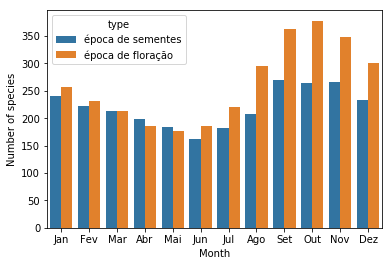

In [406]:
labels= ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
d = pd.DataFrame([ pcs_df.sum().drop('Espécie').values, pf_df.sum().drop('Espécie').values ], columns=labels)
d = d.stack().reset_index()
d.columns = ['type','Month','Number of species']
d['type'] = d['type'].apply(lambda x: 'época de sementes' if x==0 else 'época de floração')

sns.barplot(x='Month',y='Number of species',data=d,hue='type')

(0, 400)

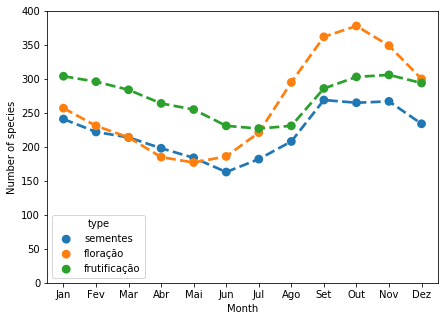

In [471]:
labels= ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
d = pd.DataFrame([ pcs_df.sum().drop('Espécie').values, 
                   pf_df.sum().drop('Espécie').values,
                   pfru_df.sum().drop('Espécie').values ], columns=labels)

d = d.stack().reset_index()
d.columns = ['type','Month','Number of species']
d['type'] = d['type'].apply(lambda x: {0:'sementes', 1:'floração',2:'frutificação'}[x])

plt.figure(figsize=(7,5))
sns.pointplot(x='Month',y='Number of species',data=d,hue='type',linestyles='--')
plt.ylim((0,400))